In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
unrate = pd.read_csv("unemp.csv", parse_dates = ["DATE"])

In [6]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    824 non-null    datetime64[ns]
 1   VALUE   824 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


In [7]:
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


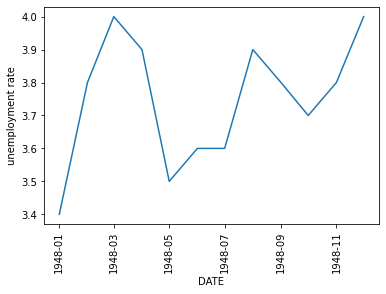

In [8]:
plt.plot(unrate["DATE"].head(12), unrate["VALUE"].head(12))
plt.xticks(rotation = 90)
plt.xlabel("DATE")
plt.ylabel("unemployment rate")
plt.show()

* When we were working with a single plot, `pyplot` was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module.
* When we want to work with multiple plots, we need to be more explicit about which plot we're making changes to. 

In [6]:
fig = plt.figure() # dpi -> inches -> axis

<Figure size 432x288 with 0 Axes>

* A `figure` acts as a container for all of our plots and 
* It has methods for customizing the appearance and behavior for the plots within that container. 

Some examples include changing the overall **width** and **height** of the plotting area and the spacing between plots.

To add a new subplot to an existing figure, use `Figure.add_subplot`. This will return a new `Axes` object, which needs to be assigned to a variable

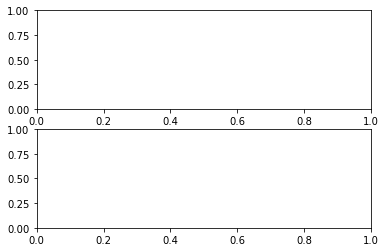

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

plt.show()

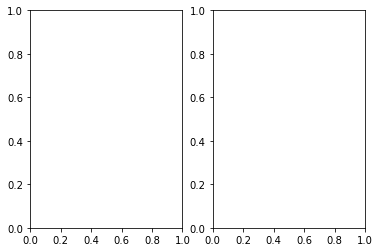

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plt.show()

To generate a **line chart** within an Axes object, we need to call `Axes.plot()` and pass in the data to be plotted:

the `Axes.plot()` will accept any iterable object for these parameters, including `NumPy` arrays and `pandas` Series objects.

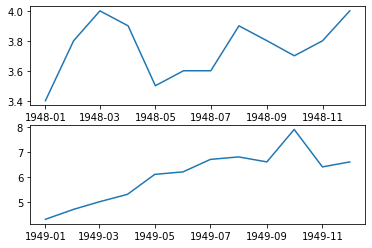

In [22]:
fig = plt.figure()
ax2 = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)

ax2.plot(unrate["DATE"].head(12), unrate["VALUE"].head(12))
ax1.plot(unrate["DATE"].loc[12:23], unrate.loc[12:23,"VALUE"])


plt.show()

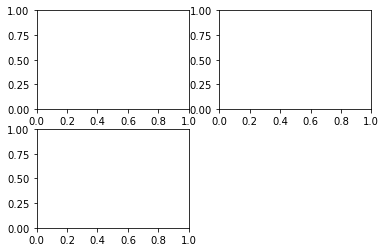

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)     # 1 <=  subplot <= 4
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)


plt.show()

We generated 2 line charts, the total plotting area for the figure remained the same

Matplotlib used the default dimensions (432x288) for the total plotting area instead of resizing it to accommodate the plots. If we want to expand the plotting area, we have to specify.

`fig = plt.figure(figsize=(width, height))`

The unit for both width and height values are in **inches**. The `dpi` parameter, or `dots per inch`, and the figsize parameter determine how much space on display a plot takes up.

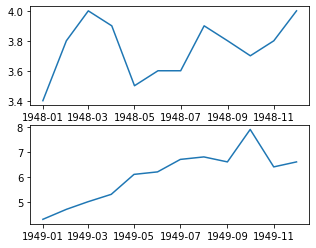

In [11]:
fig = plt.figure(figsize = (5,4))
ax2 = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)

ax2.plot(unrate["DATE"].head(12), unrate["VALUE"].head(12))
ax1.plot(unrate["DATE"][12:24], unrate.loc[12:23,"VALUE"])


plt.show()

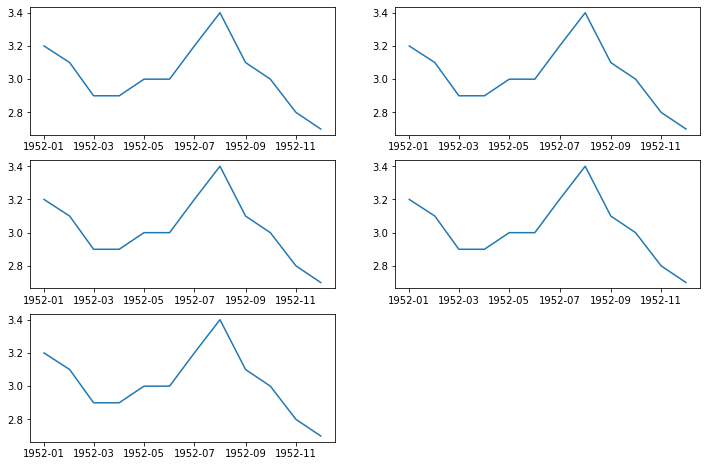

In [24]:
fig = plt.figure(figsize = (12,8))

for i in range(5):
    ax = fig.add_subplot(3,2,i+1)   #   1<= subplot <= 2
    start = i*12          # 0,12,24,36,48  ------ 0,12,24,36,48
    end =  (i+1)*12 -1    # 11,23,35,47,59 -------12,24,36,48,60
    # print(start, end)
    ax.plot(unrate.loc[start:end,"DATE"],unrate.loc[start:end,"VALUE"])
    
plt.show()

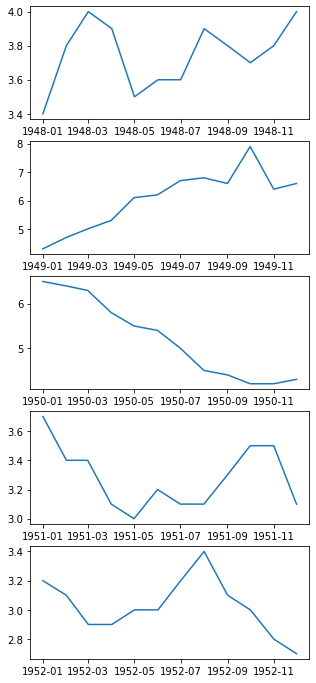

In [13]:
fig = plt.figure(figsize = (5,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)   #   1<= subplot <= 2
    start = i*12          # 0,12,24,36,48  ------ 0,12,24,36,48
    end =  (i+1)*12 -1    # 11,23,35,47,59 -------12,24,36,48,60
    # print(start, end)
    ax.plot(unrate.loc[start:end,"DATE"],unrate.loc[start:end,"VALUE"])
    
plt.show()

We now have to visually scan over more space, which is a limitation that we experienced when scanning the table representation of the same data.

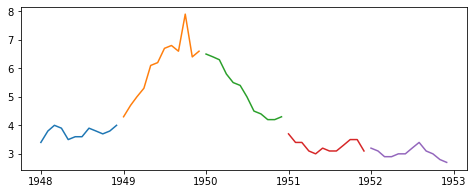

In [15]:
fig = plt.figure(figsize = (8,3))

for i in range(5):
    start = i*12          # 0,12,24,36,48  ------ 0,12,24,36,48
    end =  (i+1)*12 -1    
    plt.plot(unrate.loc[start:end, "DATE"],unrate.loc[start:end, "VALUE"])
    
plt.show()

If we remove the `year` from the x-axis and just keep the `month` values, we can use the same x-axis values to plot all of the lines.

When we call `pyplot.plot()` to generate a single line chart, Under the hood, matplotlib created a `figure` and a `single subplot` for this line chart. If we call `pyplot.plot()` multiple times, matplotlib will generate the line charts on the single subplot.

In [16]:
unrate["MONTH"] = unrate["DATE"].dt.month

In [17]:
unrate["DATE"].dt.year

0      1948
1      1948
2      1948
3      1948
4      1948
       ... 
819    2016
820    2016
821    2016
822    2016
823    2016
Name: DATE, Length: 824, dtype: int64

In [18]:
unrate.head(24)

,DATE,VALUE,MONTH
0,1948-01-01,3.4,1
1,1948-02-01,3.8,2
2,1948-03-01,4.0,3
3,1948-04-01,3.9,4
4,1948-05-01,3.5,5
5,1948-06-01,3.6,6
6,1948-07-01,3.6,7
7,1948-08-01,3.9,8
8,1948-09-01,3.8,9
9,1948-10-01,3.7,10


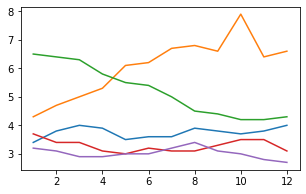

In [19]:
fig = plt.figure(figsize = (5,3))

for i in range(5):
    start = i*12          # 0,12,24,36,48  ------ 0,12,24,36,48
    end =  (i+1)*12 -1    
    plt.plot(unrate.loc[start:end, "MONTH"],unrate.loc[start:end, "VALUE"])  
plt.show()

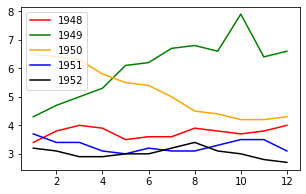

In [20]:
fig = plt.figure(figsize = (5,3))

color = ["red", "green", "orange", "blue", "black"]

for i in range(5):
    start = i*12          # 0,12,24,36,48  ------ 0,12,24,36,48
    end =  (i+1)*12 -1  
    lab = 1948+i
    plt.plot(unrate.loc[start:end, "MONTH"],unrate.loc[start:end, "VALUE"], label = lab, 
             c = color[i])
plt.legend(loc = "upper left", ) 
plt.show()

If we're working with multiple subplots, we can create a legend for each subplot. When we use `Axes.plot()` and `Axes.legend()`